# Principal Component Analysis

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [113]:
fname_data = 'assignment_12_data.txt'

original = np.genfromtxt(fname_data, delimiter=',')

X = original[:,0]
Y = original[:,1]

number_data     = np.size(feature, 0)  # 50
number_feature  = np.size(feature, 1)  # 2

print(x)
print(y)
print(number_data)
print(number_feature)

[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134 -0.0849036
 -0.4421533   1.65512791 -0.05199109  0.49306315  0.50359481  0.32935312
  0.17431471  1.08057125 -0.99325269  1.41742932  0.60026562 -0.98061987
  0.96523968  1.02758572  1.47948257 -0.3527074   1.42096858  0.23612685
 -1.25100707 -0.65914163  0.80965876  1.55322141 -1.00960561 -0.08649669
 -0.55632233  1.62794193 -0.76240011  1.15585151 -0.52859385  0.678069
 -1.1311115   1.30118495 -1.88774615  0.28696815  0.37178115 -0.69748789
 -0.82300666  0.53397558 -0.8830707  -0.01507431 -2.41895336 -1.78281708
 -0.02929162  0.97194791]
[-1.59279489  0.84034673 -0.58316356 -1.27072124 -0.8165806   1.46633237
 -1.35221189  1.65623047  0.09440519  0.61245716  0.38972985  0.45242712
 -0.04749279 -0.33689517 -1.21879266  1.29234548  0.65385394 -0.37147145
  2.32982142 -0.35168114  1.65649698 -0.1974352   1.10315805 -0.30931705
 -1.10383121 -0.05946567  0.93988062  0.10421644 -0.18146477  0.09630032
  0.87867379  0.51189675 -1.

## plot the input data

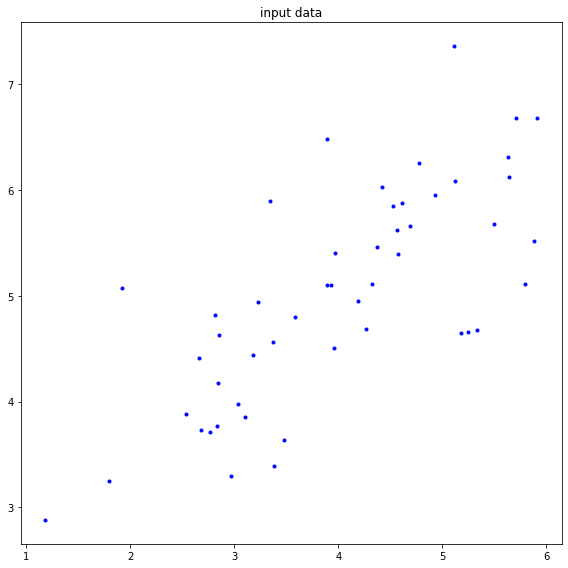

In [114]:
def plot_data(X, Y):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    
    plt.plot(X, Y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()

plot_data(X, Y)

## Normalization (Z-scoring)

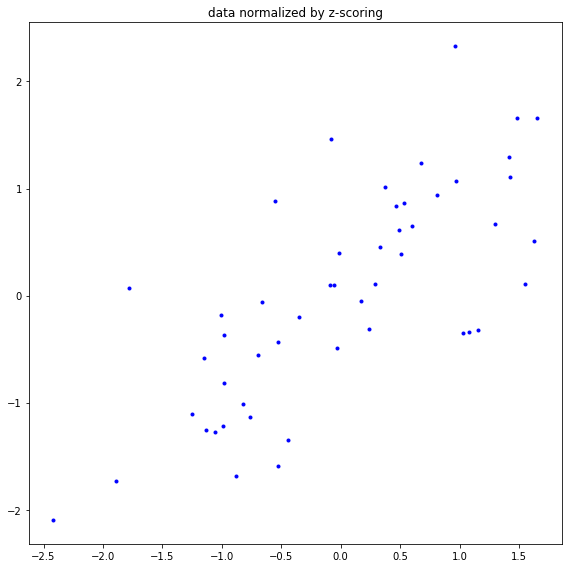

In [115]:
def normalization(X, Y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    # ===================================================
    # fill up the blank
    
    X = (X - np.mean(X))/np.std(X)
    Y = (Y - np.mean(Y))/np.std(Y)
    
    plt.plot(X, Y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()
    
    return X, Y
    
# normalization
x, y = normalization(X, Y)
feature = np.zeros(shape=(number_data, number_feature))
feature[:,0] = x
feature[:,1] = y

## compute covariance matrix

In [116]:
def compute_covariance(feature):
    # ===================================================
    # fill up the function body
    
    Sigma = np.cov(feature.T)
    
    # ===================================================
    return Sigma

s = compute_covariance(feature)

## compute principal directions

In [117]:
def compute_eigen(feature):
    # ===================================================
    # fill up the function body
    
    sigma = compute_covariance(feature)
    S, U = np.linalg.eig(sigma)
    print(S)
    
    # S 를 대각행렬로 변환
    temp = np.identity(number_feature)
    for i in range(number_feature):
        temp[i][i] = S[i]
    S = temp
    print(S)
    print(U)
    
    # ===================================================
    return S, U

S, U = compute_eigen(feature)

[1.77094898 0.26986734]
[[1.77094898 0.        ]
 [0.         0.26986734]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


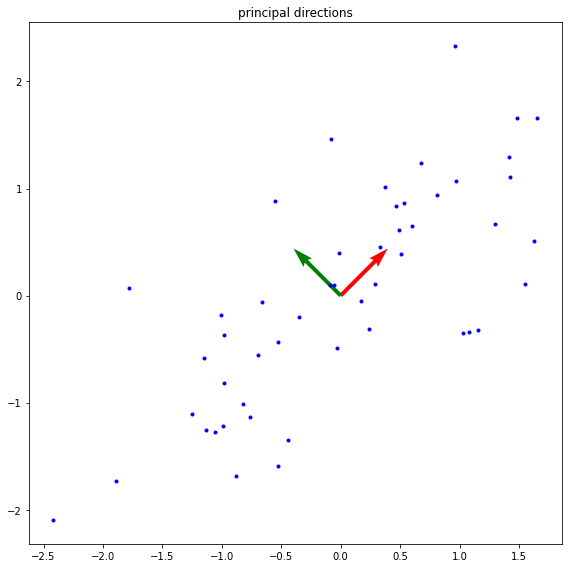

In [118]:
def plot_principal_directions(x, y):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    # ===================================================
    # fill up the blank
    
    origin = np.zeros(shape=(number_feature, number_feature))
    plt.quiver(*origin, *U, color=['r', 'g'], scale=8)
    plt.plot(x, y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_principal_directions(x, y)

## first principal axis

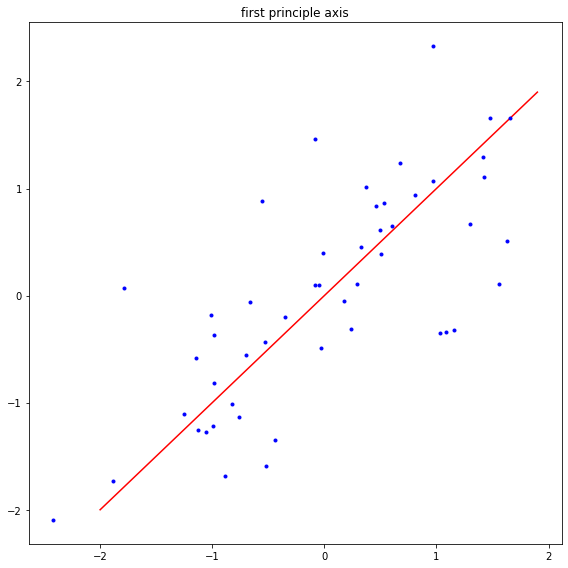

In [119]:
def plot_first_principal_axis(U):

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    # ===================================================
    # fill up the blank
    XX = np.arange(-2, 2, 0.1)
    YY = -(1/U[0,1])*(U[0,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()

plot_first_principal_axis(U)

## second principal axis

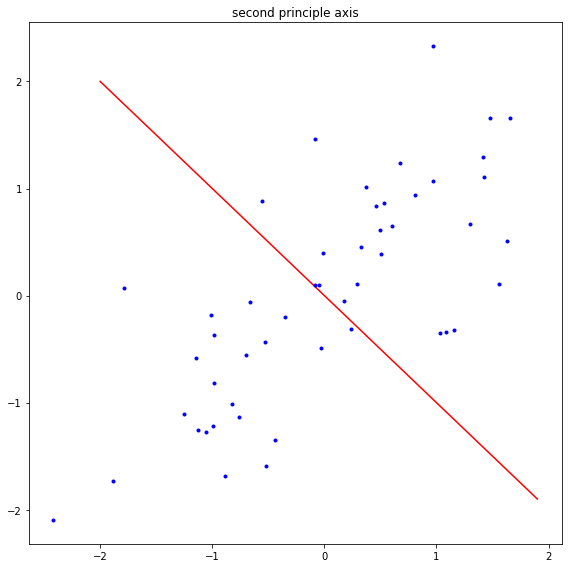

In [120]:
def plot_second_principal_axis(U_1):

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    # ===================================================
    # fill up the blank
    
    XX = np.arange(-2, 2, 0.1)
    YY = -(1/U[1,1])*(U[1,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()
             
plot_second_principal_axis(U)

## compute the projection of point onto the line

In [121]:
def compute_projection_onto_line(x, y, vector):  # vector <- U
    # ===================================================
    # fill up the function body

    norm = (vector).dot(vector.T)
    
    projection = np.zeros(shape=(number_data, number_feature))
    for i in range(number_data):
        projection[i] = (vector.dot((np.array([x[i], y[i]])).T)/norm)*vector
    
#     print(projection)
    # ===================================================
    return projection

U0_projection = compute_projection_onto_line(x, y, U[:,0])
U1_projection = compute_projection_onto_line(x, y, U[:,1])

## projcet to the first principal axis

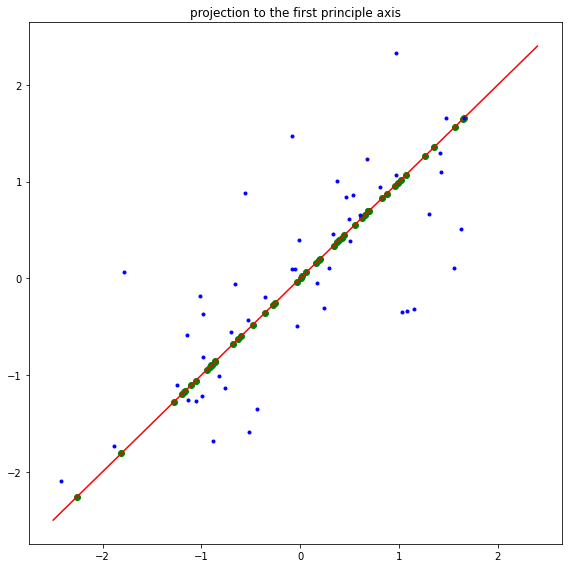

In [122]:
def plot_project_to_first_principal_axis(x, y, U):

    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    # fill up the blank
    
    proj = compute_projection_onto_line(x, y, U[:,0])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')

    XX = np.arange(-2.5, 2.5, 0.1)
    YY = (-1/U[0,1])*(U[0,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_project_to_first_principal_axis(x, y, U)

## projcet to the second principal axis

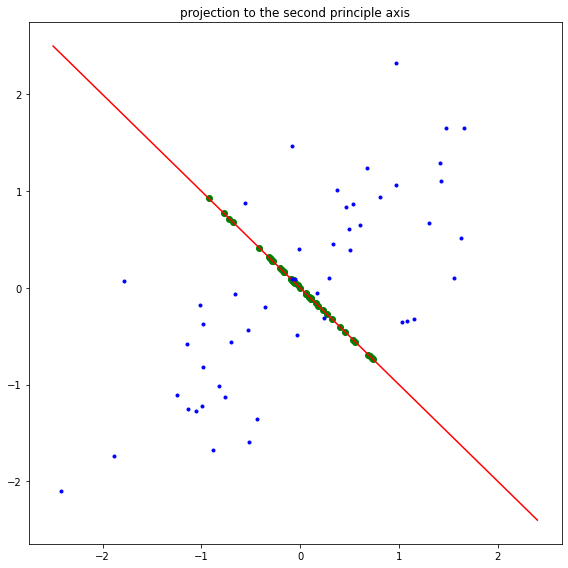

In [123]:
def plot_project_to_second_principal_axis(x, y, U):

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    # fill up the blank

    proj = compute_projection_onto_line(x, y, U[:,1])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')


    XX = np.arange(-2.5, 2.5, 0.1)
    YY = (-1/U[1,1])*(U[1,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_project_to_second_principal_axis(x, y, U)

## connect original data to the projection onto the first principal axis

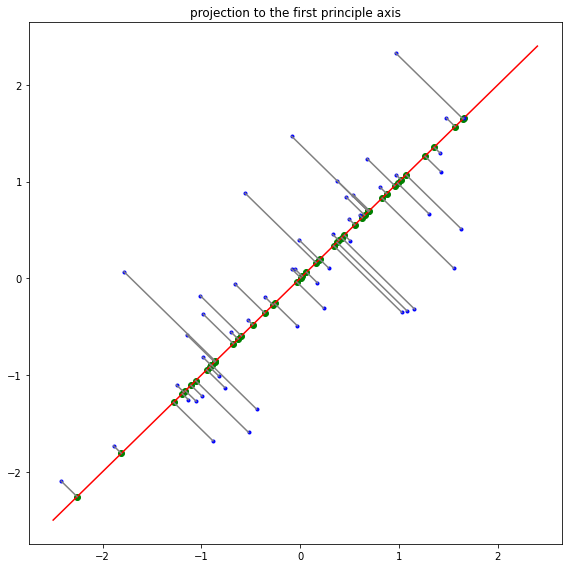

In [134]:
def plot_projection_to_the_first_principle_axis(x, y, U):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    # fill up the blank

    proj = compute_projection_onto_line(x, y, U[:,0])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')

    XX = np.arange(-2.5, 2.5, 0.1)
    YY = (-1/U[0,1])*(U[0,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    for i in range(number_data):
        X = np.array([feature[i,0],proj[i,0]])
        Y = np.array([feature[i,1],proj[i,1]])
        plt.plot(X, Y, '-', color = 'grey')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_projection_to_the_first_principle_axis(x, y, U)

## connect original data to the projection onto the second principal axis

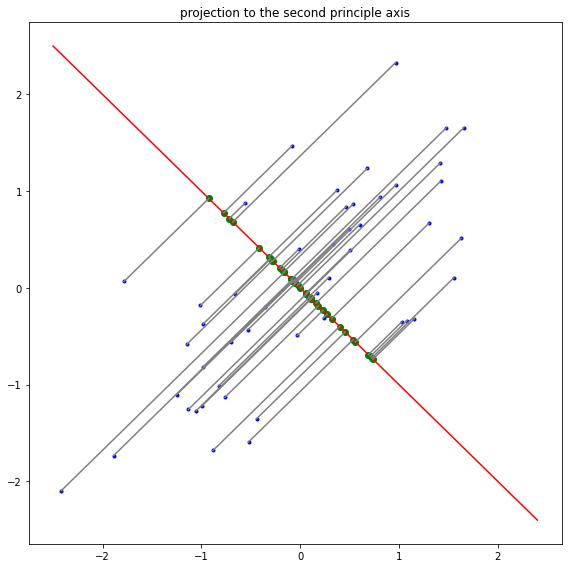

In [135]:
def plot_projection_to_the_second_principle_axis(x, y, U): 
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    # fill up the blank
    
    proj = compute_projection_onto_line(x, y, U[:,1])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')

    XX = np.arange(-2.5, 2.5, 0.1)
    YY = (-1/U[1,1])*(U[1,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    for i in range(number_data):
        X = np.array([feature[i,0],proj[i,0]])
        Y = np.array([feature[i,1],proj[i,1]])
        plt.plot(X, Y, '-', color = 'grey')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_projection_to_the_second_principle_axis(x, y, U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

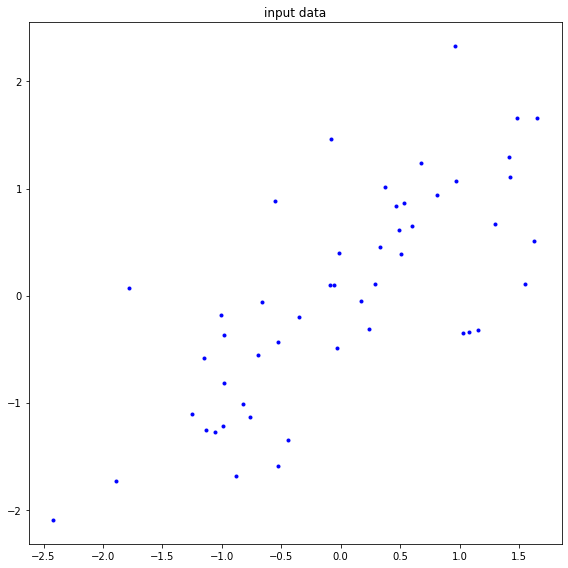

In [136]:
plot_data(x, y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

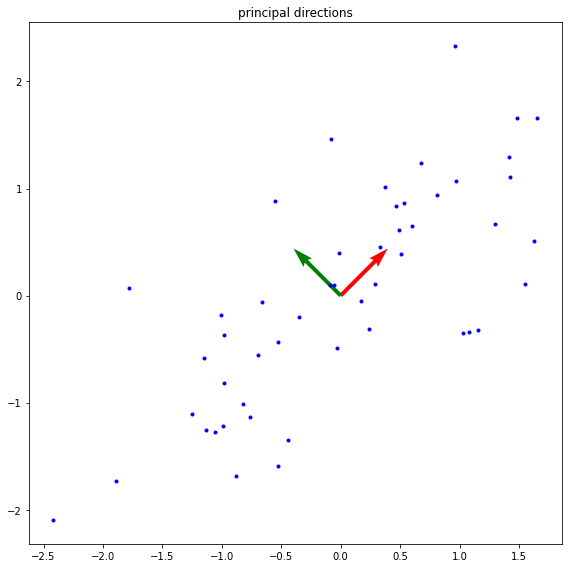

In [137]:
plot_principal_directions(x, y)

***

### 3. plot the first principal axis in red on the normalized data in blue

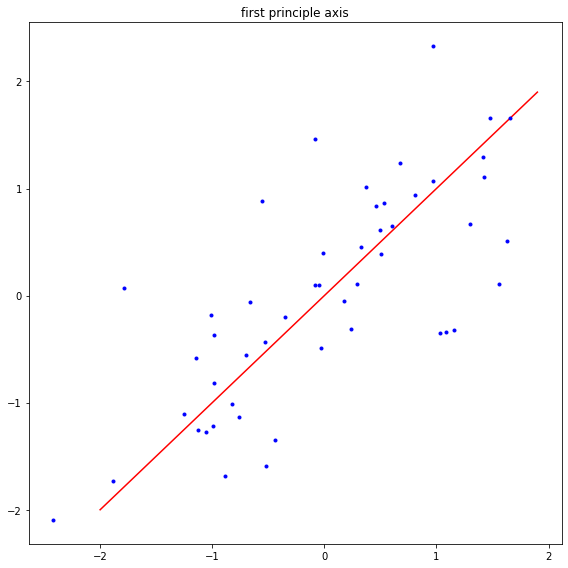

In [138]:
plot_first_principal_axis(U)

***

### 4. plot the second principal axis in red on the normalized data in blue

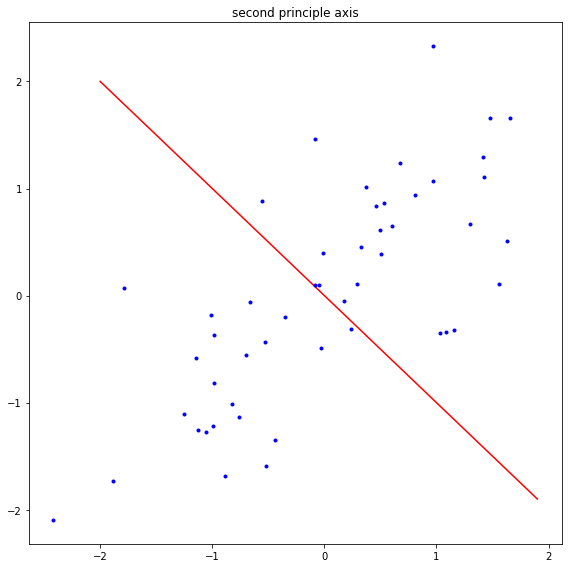

In [139]:
plot_second_principal_axis(U)

***

### 5. plot the projection of data in green onto the first principal axis in red

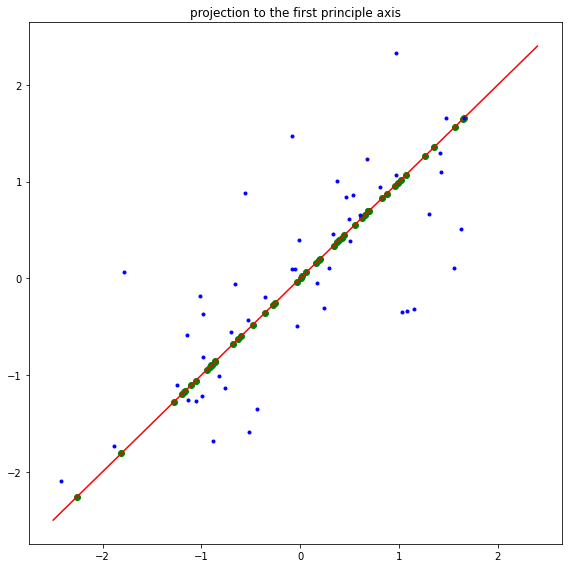

In [140]:
plot_project_to_first_principal_axis(x, y, U)

***

### 6. plot the projection of data in green onto the second principal axis in red

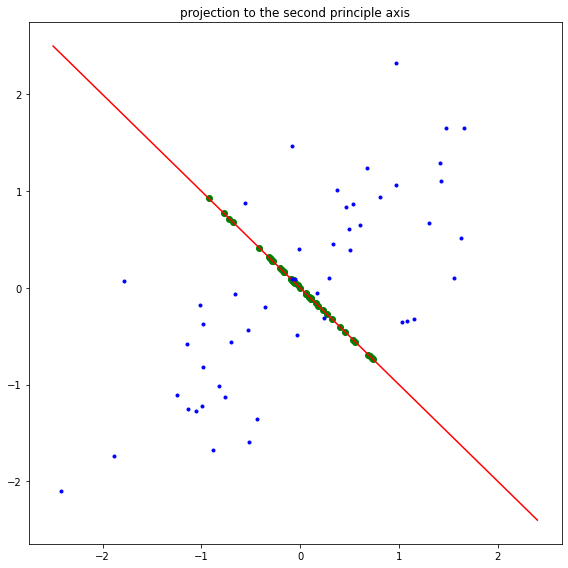

In [141]:
plot_project_to_second_principal_axis(x, y, U)

***

### 7. plot the projection line in grey onto the first principal axis

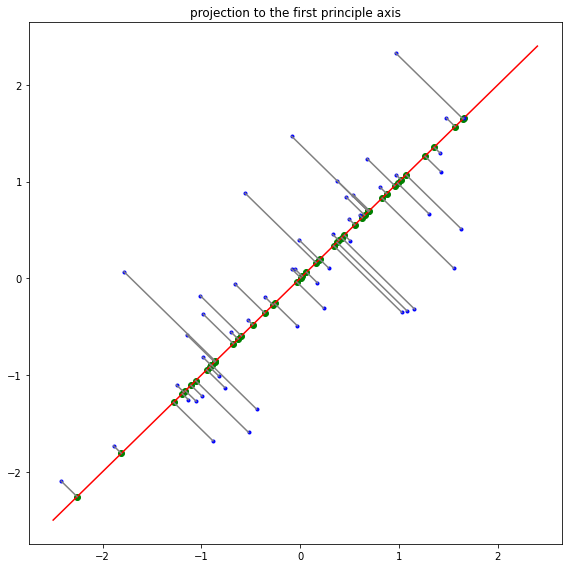

In [142]:
plot_projection_to_the_first_principle_axis(x, y, U)

***

### 8. plot the projection line in grey onto the second principal axis

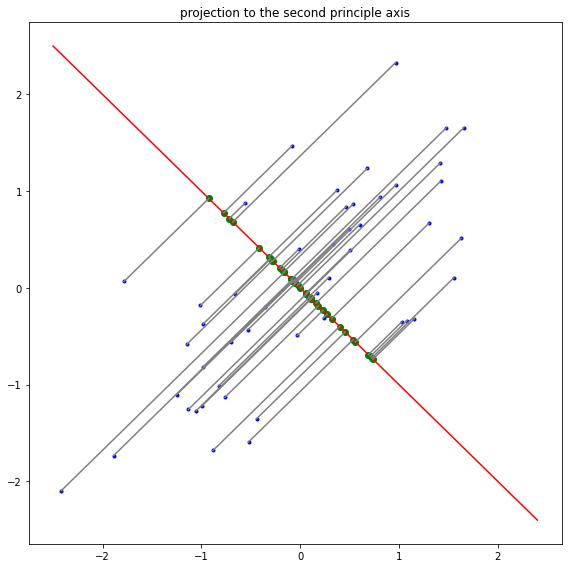

In [145]:
plot_projection_to_the_second_principle_axis(x, y, U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***